In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the data set**

In [5]:
# Loading the dataset the python environment
df = pd.read_csv("Cardiotocographic.csv")

In [6]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


## **Handling missing values**

In [13]:
#Checking missing values
missing_values = df.isnull().sum()
print(missing_values)

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [15]:
#droping the rows since the missing values are few,so that they won't distort the analysis
df_cleaned = df.dropna()

In [17]:
#checking the datatypes of columns to see if there are any incosistence in data types
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

since there are no inconsistency in data types .we can move on to next step detecting and treating outliers.

## **Detecting and Treating outliers**

In [21]:
numerical_cols = df.select_dtypes(include =['float64','int64']).columns
print('numerical columns:', numerical_cols)

numerical columns: Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


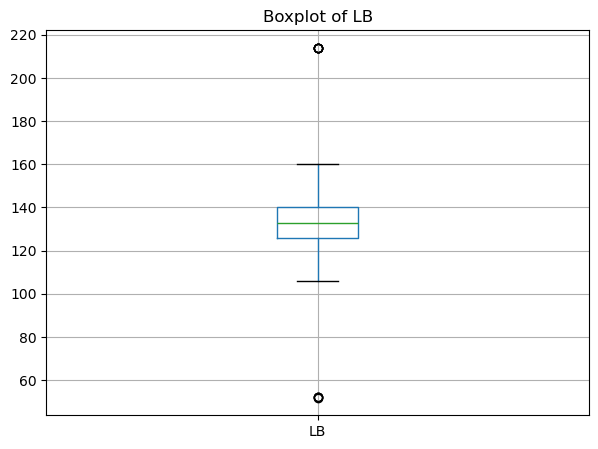

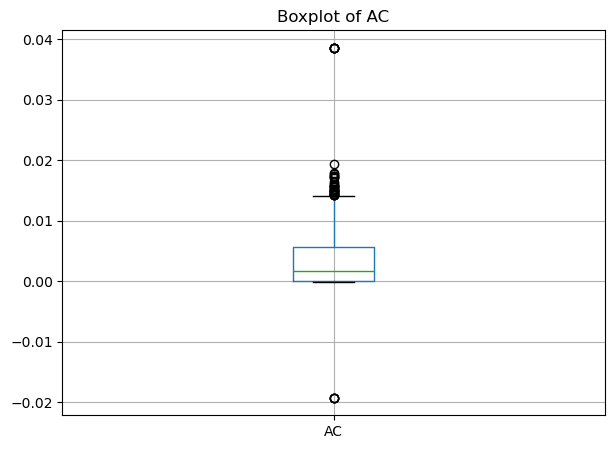

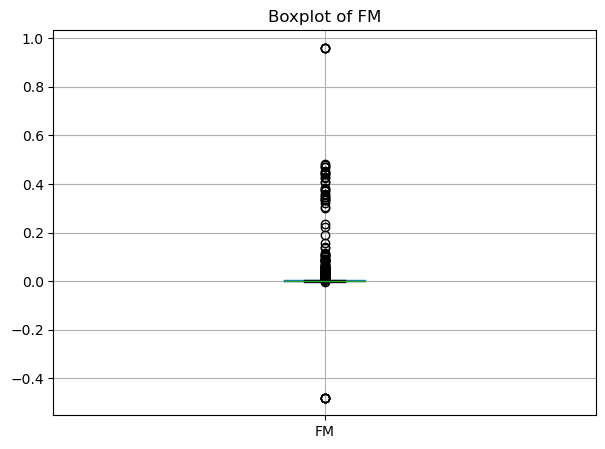

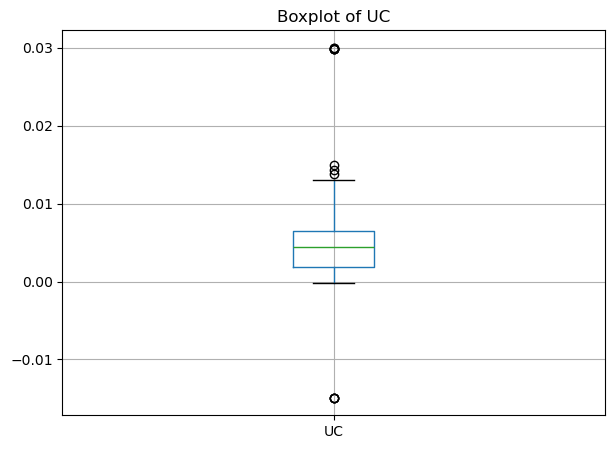

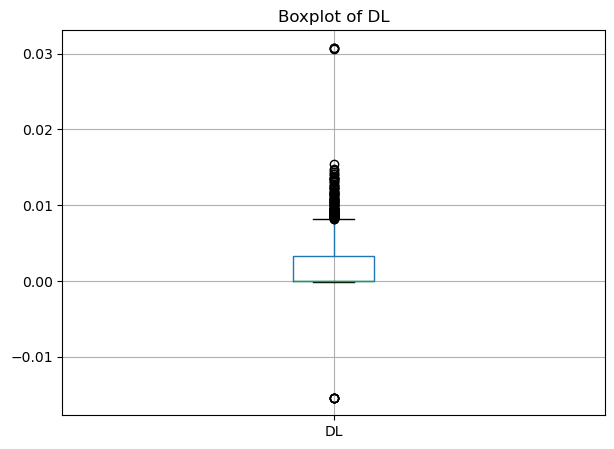

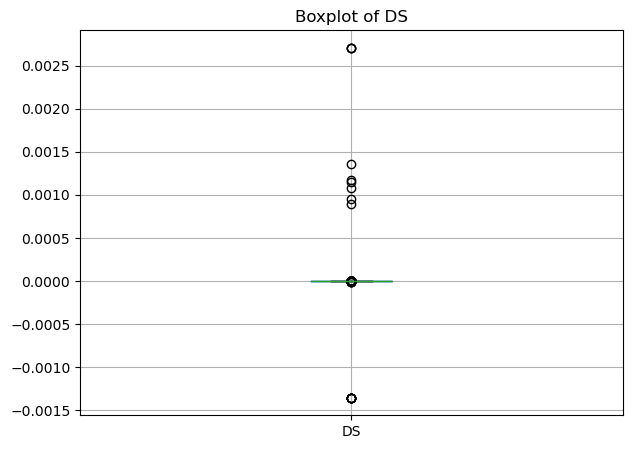

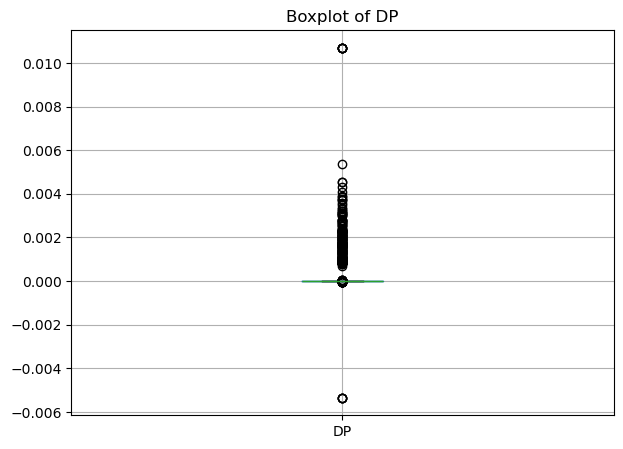

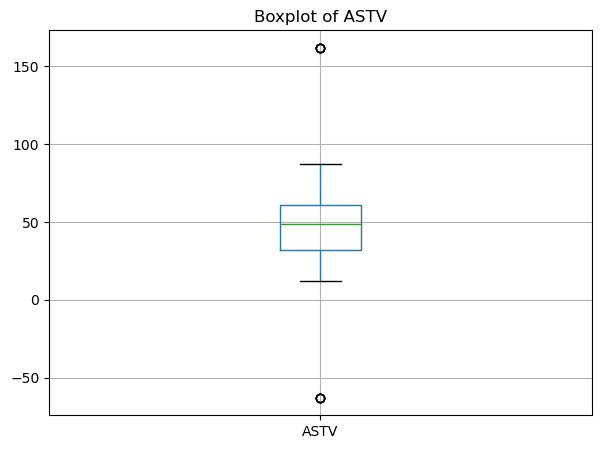

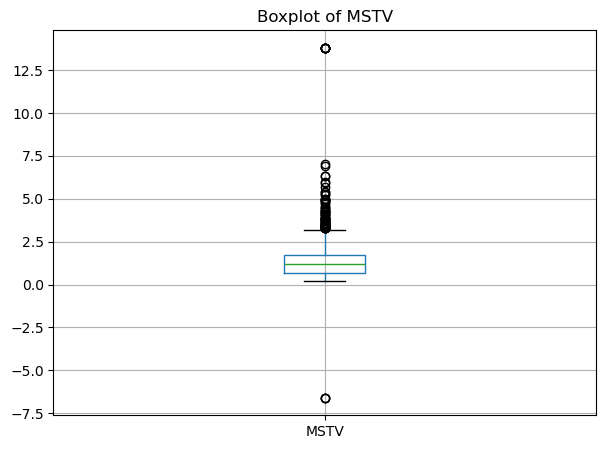

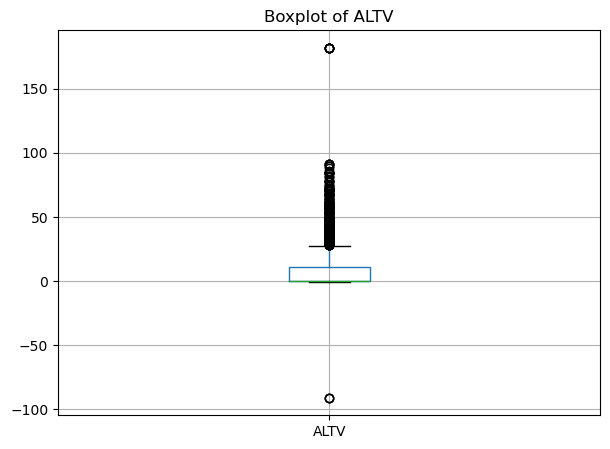

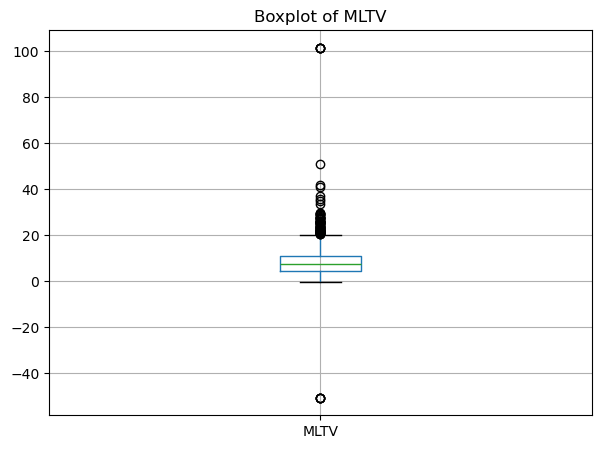

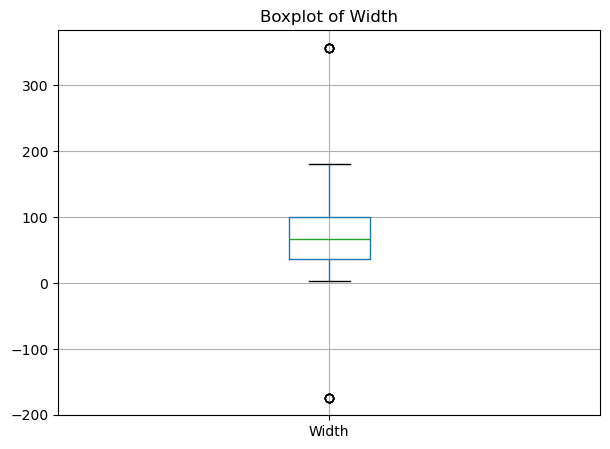

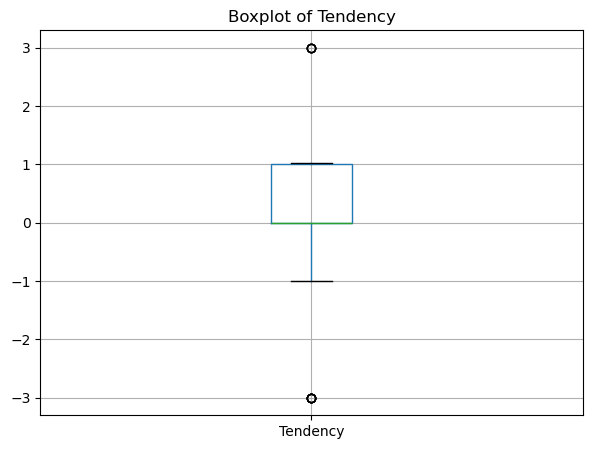

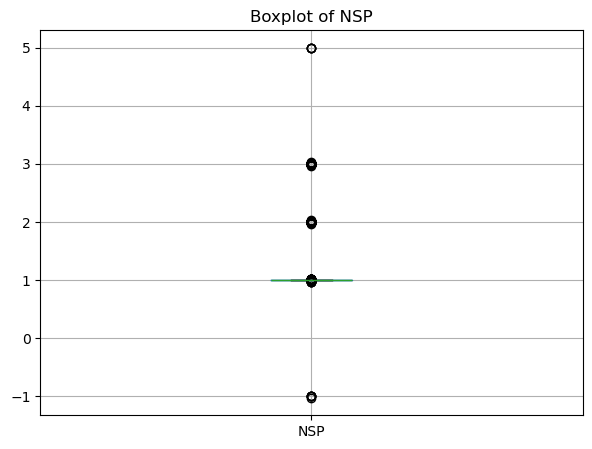

In [23]:
#All of them are numerical columns
#boxploting all numerical columns to detect outliers

for col in numerical_cols:
    plt.figure(figsize=(7, 5))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [25]:
#It appears there are some outliers in every columns
#treating outliers
# Useing (IQR)interquartile range to handle outliers
# Iterating over each numerical column
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)  # First Quartile
    Q3 = df_cleaned[col].quantile(0.75)  # Third Quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replacing outliers with the median of the column
    median = df_cleaned[col].median()
    df[col] = df_cleaned[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

## **Statistical Summary**

In [27]:
df_cleaned.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003202,0.009963,0.004388,0.001892,0.000003,0.000175,46.996929,1.361006,10.353647,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004324,0.067870,0.003350,0.003348,0.000142,0.000840,18.847737,1.173164,21.282102,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001838,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001631,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [42]:
df_cleaned.skew()

LB          0.320747
AC          1.864886
FM          6.718356
UC          0.977332
DL          2.011970
DS          8.418984
DP          6.422466
ASTV        0.055370
MSTV        4.175994
ALTV        2.968950
MLTV        3.541448
Width       0.495246
Tendency   -0.496789
NSP         1.810900
dtype: float64

In [44]:
df_cleaned.kurt()

LB           11.216031
AC           11.412960
FM           93.516872
UC           10.111995
DL           12.888402
DS          226.823353
DP           76.027876
ASTV          4.417628
MSTV         44.568205
ALTV         15.786733
MLTV         55.928804
Width         5.641817
Tendency      1.425972
NSP           3.682087
dtype: float64

## **Interesting Findings**

### **From the Summary**

 * Some columns have negative minimum values like ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP. Since there might be representing physiological measurements, negative values could be errors or anomalies.Indicates some outliers or extreme values
 * Especialy maximum values for some columns like ALTV, MLTV, Width are much larger than the upper quartile (75%), indicating potential outliers.

 * Columns like FM (Fetal Movements) have a mean of 0.0099 but a standard deviation of 0.0678, which is quite large relative to the mean. This suggests that most values are small, but a few very large values exist, making the data right-skewed.
 * NSP ranges from -1.025 to 5, but the 75th percentile is just 1.0, suggesting that values beyond 1 might be rare cases or anomalies.

 * LB (Baseline of Fetal Heart Rate) ranges from 51.8 to 214, with a standard deviation of 11.27. Given that the mean is 133, values below 100 or above 170 might be extreme cases.
 * Width (some kind of duration or frequency measure?) varies between -174 and 357, which is an extremely wide range. The negative values might be indicating an error within data recording or extremely rare cases.

 * Some columns have 25% and 50% values as zero like FM, DL, DS, DP, ALTV. This suggests that half or more of the data contains only zeros, making these features potentially sparse.

### **From skewness**

 - Most of the data is concentrated at lower values, but a few of them are extremely large values which pulls the distribution to the right.
 Highly Right-Skewed Features (Long Right Tail).especially variables like:FM (6.72),DS (8.42),DP (6.42),MSTV (4.18),ALTV (2.97),MLTV (3.54),AC (1.86),NSP (1.81),DL (2.01)
> standardization might reduces these extreme values.
 
 - A few of them are Near-Symmetric Features (Close to 0)variables like LB (0.32),ASTV (0.055),Width (0.49)
> These are approximately normal in distribution. No major transformation is needed.
   
 - Only Tendency (-0.49) variable is Left-Skewed Feature (Long Left Tail)
> This column has more extreme small values than large ones.we could try transformations like squaring values to reduce left skewness,if necessary.

### **From kurtosis**

- The variables like FM (93.52),DS (226.82),DP (76.03),MLTV (55.93),MSTV (44.57) have extremely high kurtosis (>50) ,Indicates the presence of extreme values
>They might need a transformations like normalization

- Variable like LB (11.22),AC (11.41),UC (10.11),DL (12.89),ALTV (15.79),Width (5.64) have high kurtosis (10 - 50).presence of potential for extreme values & peaked distributions
>These features have more moderate outliers compared to the extreme ones above.
Still their distributions are still peaked with some long tails.


- Moderate Kurtosis (3 - 5) means slightly peaked distributions in variables like ASTV (4.42),NSP (3.68)
These are not likely  to be extreme values but still slightly peaked compared to a normal distribution.
>Likely to have some outliers, but they aren’t as extreme as above.Probably no need for transformation unless we see major issues in visualization.

- Low Kurtosis (<3) in Tendency (1.43) variable which is likely to be near-normal distribution
>Rather than strong peaks.This indicates a more uniform spread of data,

## **Data Visualization**

### **Histograms of all Numerical columns**

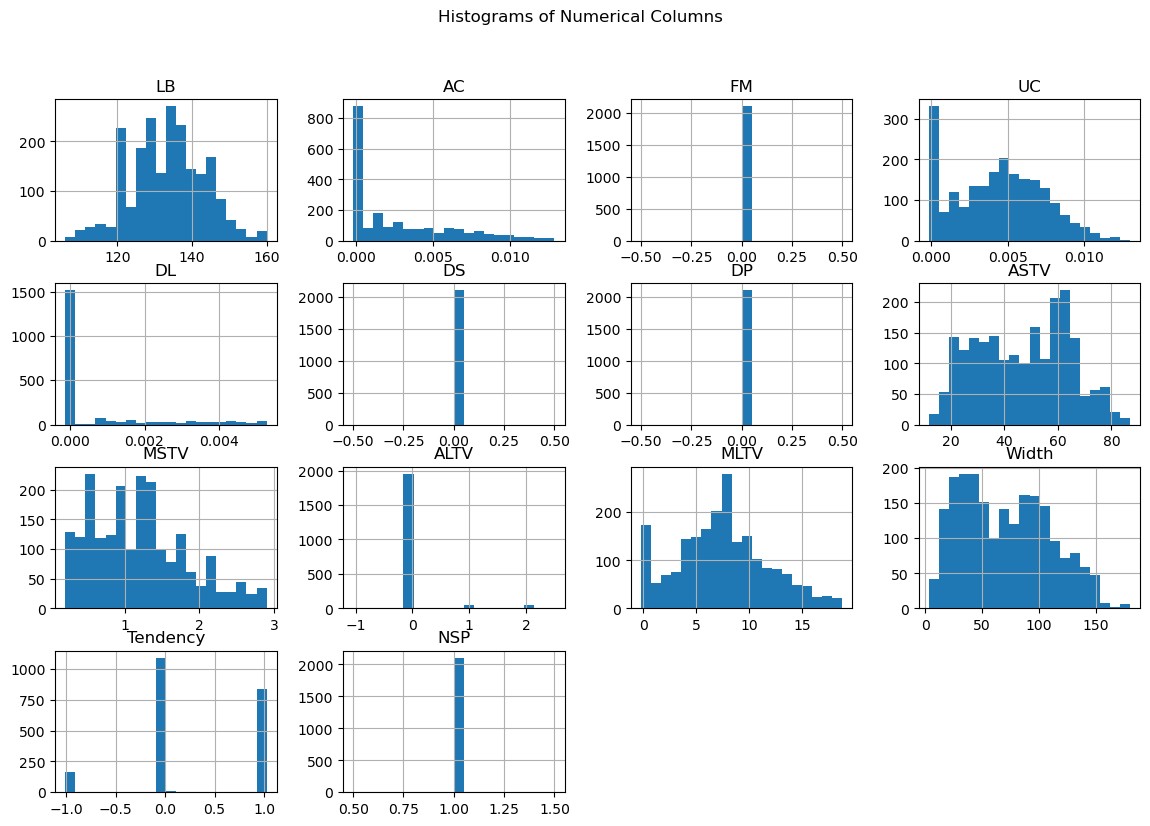

In [79]:
#Creating histograms for all columns to visualize the distributions 

df[numerical_cols].hist(bins=20, figsize=(14,9))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

### **Bar Chart for Categorical Type Columns**

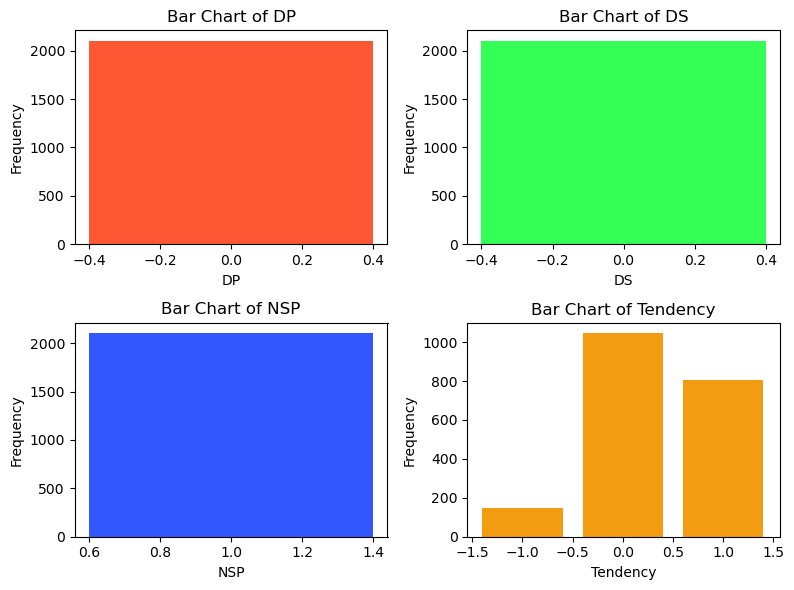

In [89]:
#categorical columns to visualize in bar charts
categorical_columns = ["DP", "DS", "NSP", "Tendency"]

# Create subplots for better visualization
fig, axes = plt.subplots(2,2,figsize=(8, 6))
colors = ['#FF5733', '#33FF57', '#3357FF', '#F39C12']

for ax, col, color in zip(axes.flatten(), categorical_columns, colors):
    value_counts = df[col].value_counts()  # Count unique values
    ax.bar(value_counts.index, value_counts.values, color=color)
    ax.set_title(f"Bar Chart of {col}")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### **Correlation Heatmap**

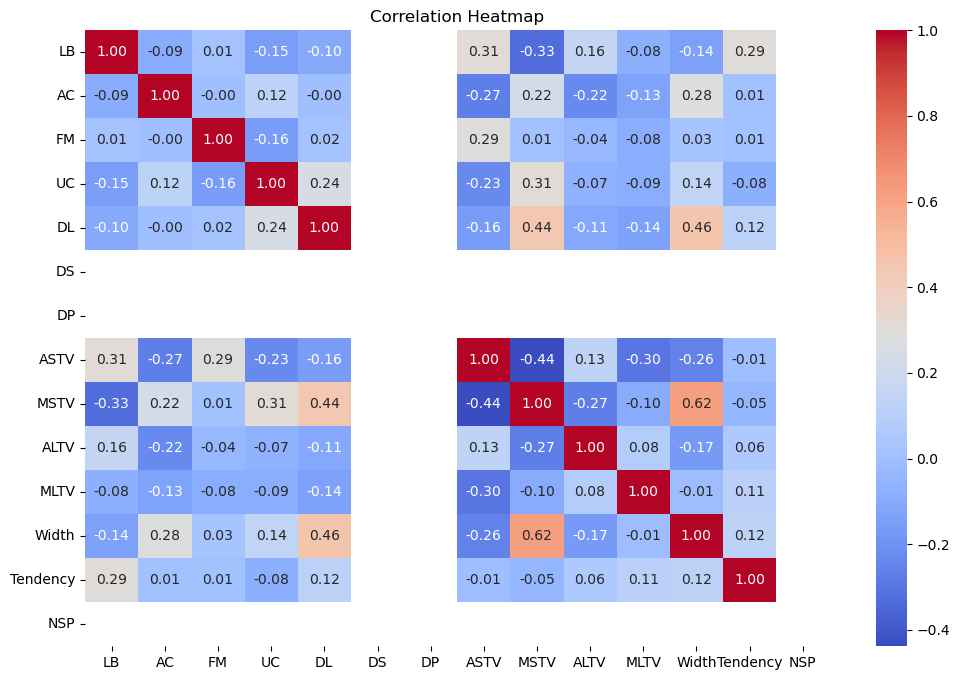

In [99]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **Violin plots and pair plots for more insights**

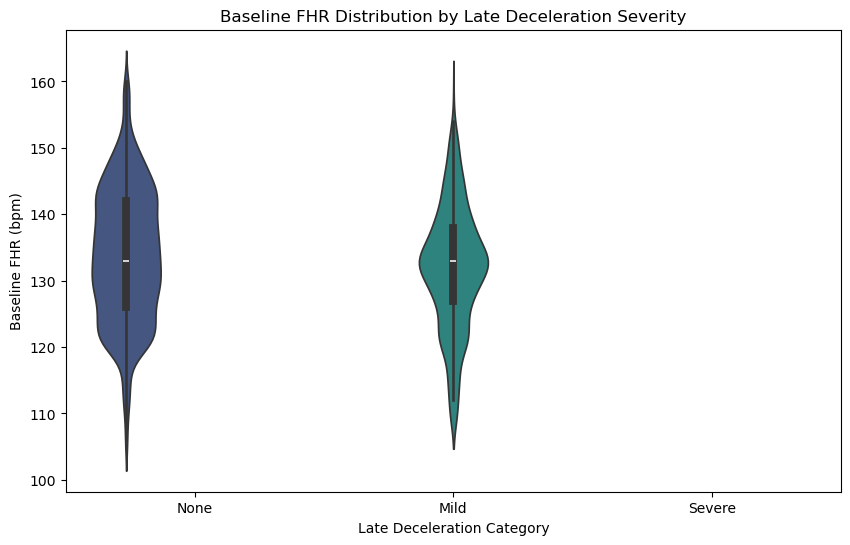

In [102]:
# Customize DL categories (example: 0=None, 1=Mild, 2=Severe)
# (Adjust thresholds based on your data distribution)
df['DL_Category'] = pd.cut(df['DL'], bins=[-1, 0, 1, 2], labels=['None', 'Mild', 'Severe'])

plt.figure(figsize=(10, 6))
sns.violinplot(x='DL_Category', y='LB', hue = 'DL_Category', data=df, palette='viridis',legend = False)
plt.title("Baseline FHR Distribution by Late Deceleration Severity")
plt.xlabel("Late Deceleration Category")
plt.ylabel("Baseline FHR (bpm)")
plt.show()

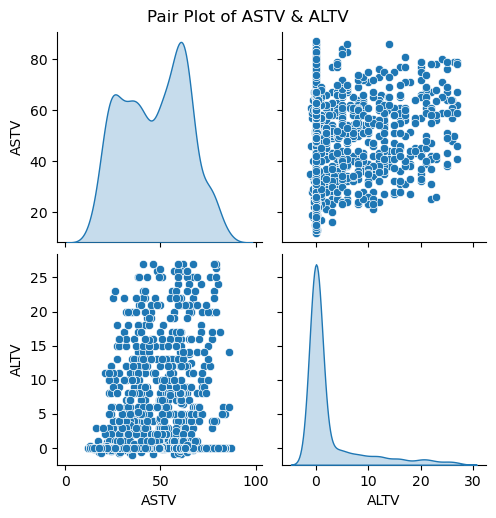

In [104]:
# Pair plot for ASTV and ALTV
sns.pairplot(df_cleaned, vars=['ASTV', 'ALTV'], diag_kind='kde')  # KDE for diagonal histograms

plt.suptitle('Pair Plot of ASTV & ALTV', y=1.02)  # Adjust title position
plt.show()

## **Pattern recognizing and insights from the correlations**

### **Key Correlations and Clinical Implications**

>ASTV (Abnormal Short-Term Variability) & NSP (0.42):
A moderate positive correlation suggests that increased time with abnormal short-term FHR variability is linked to worse neonatal outcomes (NSP).

 - ASTV is a critical marker for fetal distress. Clinically, prolonged abnormal short-term variability may necessitate interventions like emergency delivery.

>ALTV (Abnormal Long-Term Variability) & NSP (0.37):
Higher percentages of abnormal long-term variability correlate with adverse neonatal outcomes.

 - Both short-term and long-term variability abnormalities (ASTV/ALTV) are red flags, underscoring the need for continuous fetal monitoring.

>AC (Accelerations) & NSP (-0.32):
More frequent FHR accelerations are associated with better neonatal outcomes (lower NSP scores).

 - Accelerations reflect fetal well-being. Reduced accelerations may indicate hypoxia or distress, requiring closer surveillance.

>DL (Late Decelerations) & MSTV (Mean Short-Term Variability) (0.41):
Late decelerations correlate with higher mean short-term variability.

 - Late decelerations (a sign of uteroplacental insufficiency) may trigger compensatory increases in variability as the fetus attempts to adapt to stress. This paradoxical relationship highlights the complexity of fetal responses to hypoxia.

>MSTV (Mean Short-Term Variability) & Width (Contraction Duration) (0.44):
Longer uterine contractions correlate with higher mean short-term variability.

 - Prolonged contractions may induce intermittent fetal stress, leading to fluctuations in heart rate variability. Monitoring contraction patterns alongside variability is essential.

>ASTV & MSTV (-0.29):
Increased abnormal short-term variability correlates with reduced mean short-term variability.

 - Abnormalities in short-term variability (e.g., flatlined patterns) may lower the overall mean, reflecting diminished physiological adaptability.

### **A Few Notable Negative Correlations**

>LB (Baseline FHR) & UC (Uterine Contractions) (-0.17):
Higher baseline FHR slightly decreases during contractions, possibly due to transient fetal stress.

>AC (Accelerations) & ALTV (-0.27):
Frequent accelerations are linked to less abnormal long-term variability, reinforcing accelerations as a reassuring sign.

 **Trends Over Time:**
 - As previously noted, the data is a static correlation matrix. Temporal trends cannot be judged without sequential measurements. For example:

 - How decelerations like DL/DS/DP evolve during delivery.

 - Whether variability of MSTV/MLTV changes in response to prolonged contractions.

 **Clinical Takeaways:**
 - High-Risk Indicators: ASTV, ALTV, and late decelerations (DL) are strongly tied to adverse outcomes.

 - Reassuring Signs: Accelerations (AC) and normal variability of MSTV/MLTV correlate with better outcomes.

 Actionable Insight: A combined evaluation of decelerations, variability, and accelerations provides a more holistic fetal assessment than isolated metrics.

## **Conclusion**

In this exploratory data analysis of the "cardiographic.csv" dataset, we conducted a thorough examination of the various features related to fetal heart rate and uterine contractions. Here are the key insights and findings:
### **Statistical Summery:**
 - The summary provides a comprehensive analysis of various data columns, highlighting potential issues with outliers and skewness in the dataset.
 - It notes that several columns exhibit negative minimum values, suggesting possible errors in physiological measurements.
 - The presence of extreme maximum values in columns like ALTV and MLTV indicates potential outliers, while the right-skewed distribution of Fetal Movements (FM) suggests that most values are small, with a few significantly larger ones.
 - Additionally, the summary discusses the kurtosis of different variables, indicating varying degrees of peakedness and the presence of extreme values.
 - Overall, the analysis emphasizes the need for careful data transformation and standardization to address these anomalies and improve the dataset's reliability
### **Data Visualization:**
 - The correlations between fetal health metrics (e.g., ASTV, ALTV, accelerations) and neonatal outcomes are likely visualized through correlation matrices, heatmaps, or line graphs to highlight relationships.
 -  Clinical dashboards or monitoring systems may display real-time metrics like heart rate variability (MSTV), decelerations (DL), and uterine contraction patterns to aid in fetal assessment.
 -   For example, a heatmap could illustrate the strength of correlations (e.g., ASTV & NSP: 0.42), while dynamic charts might track accelerations or variability trends during labor, supporting rapid clinical decision-making.

### **Pattern Recognition and Insights:**

 **Key Correlations:**

 - ASTV/ALTV & NSP: Moderate positive correlations (0.42 and 0.37) link abnormal short/long-term heart rate variability to adverse neonatal outcomes, signaling fetal distress.

 - Accelerations (AC) & NSP: Negative correlation (-0.32) suggests frequent accelerations indicate fetal well-being.

 - Late Decelerations (DL) & MSTV: Paradoxical positive correlation (0.41) may reflect compensatory fetal responses to hypoxia.

 **Negative Relationships:**

Reduced accelerations correlate with abnormal long-term variability (-0.27), reinforcing accelerations as reassuring.

 **Clinical Insights:**

 >High-risk indicators:
  Elevated ASTV, ALTV, and late decelerations require urgent intervention (e.g., emergency delivery).

  >Reassuring signs:
> Normal MSTV/MLTV variability and frequent accelerations suggest stable fetal health.

 **Actionable Insight:**
 Combined monitoring of decelerations, variability, and accelerations improves holistic fetal assessment, guiding interventions like closer surveillance or delivery planning.

 **Trends Over Time:**
While static data limits temporal analysis, future dynamic tracking (e.g., deceleration evolution during labor) could refine risk stratification.
 
  **EDA Impact on Decision-Making and further analysis**
 - Desperate Interventions: Elevated ASTV/ALTV and late decelerations (DL) signals fetal distress, prompting actions like emergency delivery or intensified monitoring.

 - Reassuring Metrics: Frequent accelerations (AC) correlate with fetal well-being, reducing unnecessary interventions in stable cases.

 - Integrated Monitoring: Combining variability of (MSTV/MLTV), decelerations, and accelerations improves risk assessment (e.g., normal MSTV + frequent AC may delay intervention, while isolated DL requires escalation).

 - Contraction Context: Prolonged uterine contractions (Width) linked to MSTV (0.44) highlight the need to monitor labor progress and adjust care (e.g., delivery planning).

 **Furthur Analyses**

 - A lot of variables have extreme values ,standardization needed for more accurate analysis


 - Dynamic Trends: Study temporal patterns (e.g., how DL/MSTV evolve during labor) to refine real-time risk prediction.

 - Mechanistic Insights: Investigate paradoxical relationships (e.g., DL-MSTV correlation) to understand fetal stress responses.

 - Predictive Models: Develop machine learning tools integrating ASTV, DL, and AC to predict adverse outcomes (NSP scores).

 - Protocol Testing: Validate clinical workflows that combine real-time dashboards with decision-support algorithms.

 **Key Implications**
 - Tailored Care: Use ASTV/AC to escalate or de-escalate interventions, balancing urgency and caution.

 - Research Focus: Prioritize dynamic, causal studies to translate correlations into actionable pathways.

 - Technology Integration: Build tools synthesizing variability, decelerations, and accelerations into clinician-friendly insights.

Final Take-away: These findings enable more precise fetal monitoring, guiding timely interventions and reducing neonatal risks. Future work should focus on validating these insights in diverse populations and integrating them into predictive, real-world clinical systems.

### **Note**

At first, i couldn't understand a bit about the assignment topic. so i used a few articles from internet for analysis and i still don't understand fully enough to explain properly .I hope for your pardon for my misinterpretations 